# Factors affecting Borrower APR and the Borrower Rate

## Investigation Overview

In this presentation, I analysed the different factors affecting the borrower rate and APR such as income ranges, employment status, original loan amounts, loan term and the loan status. 

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loans_df=pd.read_csv('prosperLoanData.csv')

In [5]:
#Extracting the columns I need
loans=loans_df.loc[:, ['ListingKey', 'ListingNumber', 'ListingCreationDate',  'CreditGrade',  'Term', 'LoanStatus',  
                       'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',  'BorrowerState', 'Occupation',  
                       'EmploymentStatus', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']]               

In [6]:
loans.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0           C    36  Completed      0.16516        0.1580   
1         NaN    36    Current      0.12016        0.0920   
2          HR    36  Completed      0.28269        0.2750   
3         NaN    36    Current      0.12528        0.0974   
4         NaN    36    Current      0.24614        0.2085   

  ProsperRating (Alpha)  ProsperScore BorrowerState     Occupation  \
0                   NaN           NaN            CO          Other   
1                     A           7.0            CO   Professional   
2                   NaN           NaN            GA          Other   
3                     A           9.0            GA  Skilled Labor   
4                     D           4.0            MN      Executive   

  EmploymentStatus     IncomeRange  StatedMonthlyIncome  LoanOriginalAmount  \
0    Self-employed  $25,000-49,999          3083.333333                9425   
1         Employed  $50,000-74,999          6125.000000               10000   
2    Not available   Not displayed          2083.333333                3001   
3         Employed  $25,000-49,999          2875.000000               10000   
4         Employed       $100,000+          9583.333333               15000   

   MonthlyLoanPayment  
0              330.43  
1              318.93  
2              123.32  
3              321.45  
4              563.97

In [31]:
#Converting the ordinal data into ordered categorical data type
ordinal_data= {'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              'IncomeRange':['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
              'ProsperRating (Alpha)':['HR','E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_data:
    ordered_data= pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_data[var])
    loans[var]= loans[var].astype(ordered_data)

## Dataset Overview

For this project on Communicating Findings, I used the Loans data from Prosper. I downloaded this dataset through a link in the classroom. The dataset consists of 113937 rows and 81 columns. 
I did some preliminary wrangling by choosing the variables I need for my analysis. I then converted the ordinal data types into categorical data. For my analysis, I did the univariate, bivariate and multivariate explorations. From the larger dataset, I drew the columns such as the term, loan status, borrower rate, borrower APR, prosper rating, prosper score, borrower state, occupation, borrower state, income range, emlployment status, loan amount and monthly loan payment. 


## Distribution of the Borrower Rate and Borrower APR

The Borrower interest rate plot almost looks like the APR plot which depicted a normal ditribution initially before plotting it under smaller binsizes. However, the frequencies of the two plots differ. This is because the APR is an analysis of the different rates over the years. The interest rate plot spikes at around 0.33% whire the APR spikes at around 0.36%. 

Text(0.5, 1.0, 'Borrower Rate Distribution')

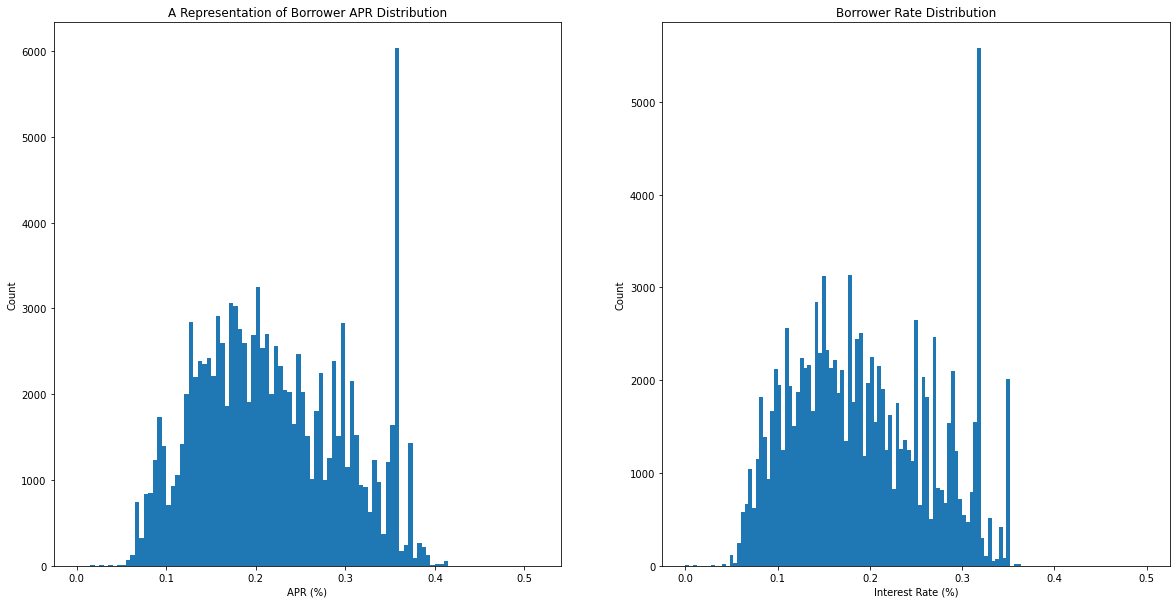

In [32]:
plt.figure(figsize=[20, 10])

base_color=sb.color_palette()[0]

plt.subplot(1, 2, 1)
bins = np.arange(0, loans['BorrowerAPR'].max()+0.005, 0.005)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.xlabel('APR (%)')
plt.ylabel('Count')
plt.title('A Representation of Borrower APR Distribution')


plt.subplot(1, 2, 2)
bins = np.arange(0, loans['BorrowerRate'].max()+0.004, 0.004)
plt.hist(data = loans, x = 'BorrowerRate', bins = bins);
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.title('Borrower Rate Distribution')

## Relationship between Borrower Rate and Borrower APR

The borrower rate and the borrower APR depict a strong positive relationship, implying an increase in one variable causes an increasein the other variable. 

Text(0.5, 1.0, 'Relationship between the interest rate and the APR')

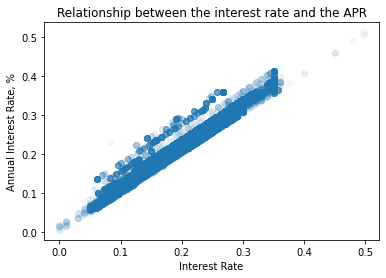

In [33]:
plt.scatter(data=loans, x='BorrowerRate', y='BorrowerAPR', alpha=1/20);
plt.xlabel('Interest Rate')
plt.ylabel('Annual Interest Rate, %')
plt.title('Relationship between the interest rate and the APR')

## Loan Original Amount versus Borrower APR

The original loan amount and the borrower APR have a negative relationship. This asssociation explains that those with a higher loan amount receiveed their loans at lower interest rates as compared to their counterparts with lower loan amounts.  

Text(0.5, 1.0, 'Relationship between Borrower APR and Loan Original Amount')

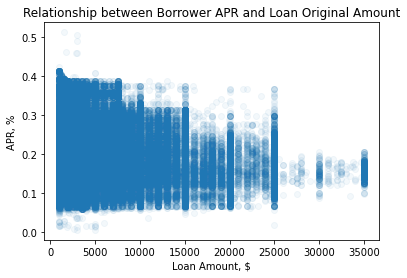

In [34]:
# Investigating the relationship between APR and laon amount

plt.scatter(data=loans, x='LoanOriginalAmount', y='BorrowerAPR', alpha=1/20);
plt.xlabel('Loan Amount, $')
plt.ylabel('APR, %')
plt.title('Relationship between Borrower APR and Loan Original Amount') 

## Income Range Versus Borrower APR

From this violin plot, as the mean income range increases, the interest rates on loans decreases. This is probably because people with large incomes also take large amounts of loans which as we had observed earlier, as the loan amount increases, the loan interest rate decreases. 

Text(0.5, 1.0, 'Relationship between Income Range and APR')

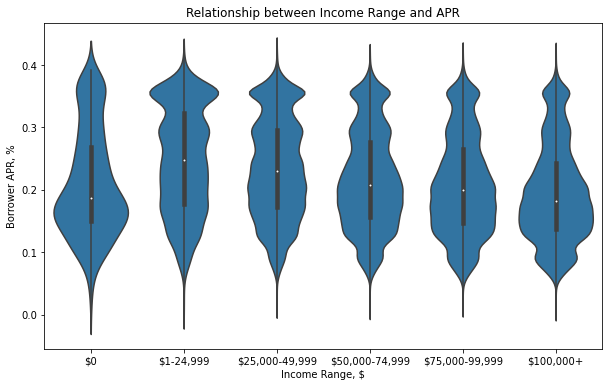

In [35]:
#income range versus APR
plt.figure(figsize=[10,6])
sb.violinplot(data=loans, x='IncomeRange', y='BorrowerAPR', color=base_color);
plt.xlabel('Income Range, $')
plt.ylabel('Borrower APR, %')
plt.title('Relationship between Income Range and APR') 

## Loan term on APR versus Borrower Rate

The borrower rate and the APR have a strong positive relationship. Additionally, I also observe that those subscribed to the 12 months loan term pay higher interest rates compared to those subscribed to the longer term with 60months. 

C:\Users\Elijah\Downloads\ANACONDA\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Loan Term on Borrower Rate vs APR')

<Figure size 720x432 with 0 Axes>

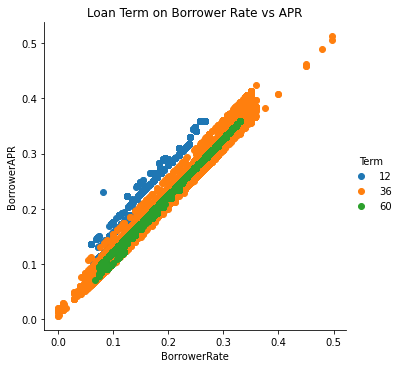

In [36]:
#Loan term plotted on borrower rate and APR
plt.figure(figsize=[10,6])
g = sb.FacetGrid(data = loans, hue = 'Term', size = 5)
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR', cmap='viridis_r');
g.add_legend()
plt.title('Loan Term on Borrower Rate vs APR')

## Employment Status plotted on Borrower APR versus Loan status

Fom this plot, the loan defaulters and those overdue, under all the employment status categories are charged higher interest rates for their loans, the interest rates are especially highest for the eslf-employed among those overdue.  

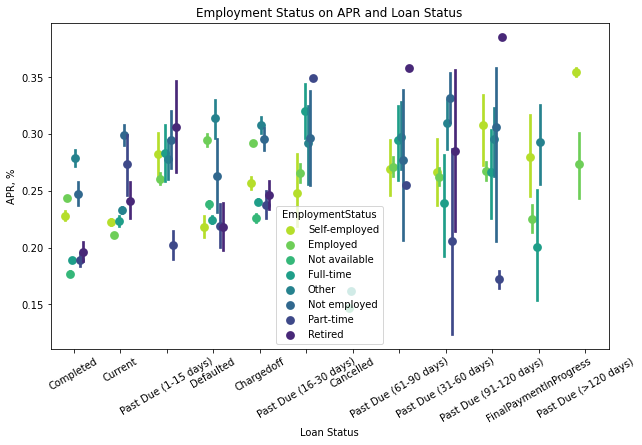

In [30]:
#Point plot to show the relationship between the categorical variables and the APR
plt.figure(figsize=[10, 6])
ax=sb.pointplot(data=loans, x='LoanStatus', y='BorrowerAPR', hue='EmploymentStatus', 
                linestyles='', dodge=0.4, palette='viridis_r');
plt.xlabel('Loan Status')
plt.ylabel('APR, %')
plt.title('Employment Status on APR and Loan Status')
plt.xticks(rotation=30)
plt.show()

## Generating a Slide Show

In [13]:
!jupyter nbconvert Explanatory_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Explanatory_slides.ipynb to slides
[NbConvertApp] Writing 846440 bytes to Explanatory_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Elijah\Downloads\ANACONDA\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Elijah\Downloads\ANACONDA\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Elijah\Downloads\ANACONDA\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Elijah\Downloads\ANACONDA\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Elijah\Downloads\ANACONDA\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.c